## Лабораторная работа "Введение в ML"

В этой лабораторной вы:

- познакомитесь с базовыми библиотеками для работы с табличными данными — `numpy` и `pandas`
- поближе посмотрите на простейшие задачи машинного обучения: классификацию и регрессию
- попробуете несколько метрик и поймёте, почему выбор метрики это важно
- обучите несколько простых моделей
- увидите связь между сложностью модели и переобучением
- убедитесь, что без данных всё тлен

Загрузка самых базовых библиотек:

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

### [NumPy](https://numpy.org/doc/stable/user/index.html)

С 1995 numeric, с 2006 NumPy — «Numerical Python extensions» или просто «NumPy»

Возможности библиотеки NumPy:
* работать с многомерными массивами (таблицами)
* быстро вычислять математические функций на многомерных массивах

Ядро пакета NumPy — объект [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

**Важные отличия** между NumPy arrays и Python sequences:
* NumPy array имеет фиксированную длину, которая определяется в момент его создания (в отличие от Python lists, которые могут расти динамически)
* Элементы в NumPy array должны быть одного типа
* Можно выполнять операции непосредственно над NumPy arrays

**Скорость** NumPy достигается с помощью:
* реализации на C
* векторизации и броадкастинга (broadcasting). Например, произведение массивов совместимых форм.

Теперь давайте разберёмся подробнее и сделаем что-нибудь приятное и полезное в `numpy`!

### Индексация

В NumPy работает привычная индексация Python, ура! Включая использование отрицательных индексов и срезов (slices)

<div class="alert alert-info">
<b>Замечание 1:</b> Индексы и срезы в многомерных массивах не нужно разделять квадратными скобками,
т.е. вместо <b>matrix[i][j]</b> нужно использовать <b>matrix[i, j]</b>. Первое тоже работает, но сначала выдаёт строку i, потом элемент j в ней.
</div>

<div class="alert alert-danger">
<b>Замечание 2:</b> Срезы в NumPy создают view, а не копии, как в случае срезов встроенных последовательностей Python (string, tuple and list).
</div>

In [218]:
ones_matrix = np.ones((5, 5))
ones_submatrix_view = ones_matrix[::2,::2] # creates a view, not copy
ones_matrix[::2,::2] = np.zeros((3, 3))
ones_submatrix_view

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Ссылка на Яндекс.Контест

Решения и ответы в задачах, расположенных ниже, загружайте в контест на автоматическую проверку:
https://new.contest.yandex.ru/60376/start


**1.** Реализуйте функцию, принимающую на вход два одномерных массива `first_array` и `second_array` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

Вероятно первое, что приходит вам на ум, это конкатенация и транспонирование:

In [219]:
def construct_matrix(first_array, second_array):
    """
    Construct matrix from pair of arrays
    :param first_array: first array
    :param second_array: second array
    :return: constructed matrix
    """
    matrix_right_1 = np.column_stack([first_array, second_array])
    matrix_right_2 = np.vstack([first_array, second_array]).T #яндекс выдает неправильно из-за .T
    matrix_right_3 = np.reshape(np.concatenate([first_array, second_array], axis=0), (len(first_array), 2), order="F")
    return matrix_right_3, matrix_right_1

In [220]:
construct_matrix(np.array([1,2]),np.array([3,4]))

(array([[1, 3],
        [2, 4]]),
 array([[1, 3],
        [2, 4]]))

(в скобках заметим, что конкатенировать можно vertically, horizontally, depth wise методами vstack, hstack, dstack по трём осям (0, 1 и 2, соотвественно), либо в общем случае `np.concatenate` — поиграйтесь ниже с прекрасным примером четырёхмерной точки, чтобы точно всё для себя понять)

In [221]:
p = np.arange(1).reshape([1, 1, 1, 1])
p

array([[[[0]]]])

In [222]:
print("vstack: ",  np.vstack((p, p)).shape)
print("hstack: ", np.hstack((p, p)).shape)
print("dstack: ", np.dstack((p, p)).shape)

vstack:  (2, 1, 1, 1)
hstack:  (1, 2, 1, 1)
dstack:  (1, 1, 2, 1)


In [223]:
import random
from collections import defaultdict, Counter


nums = np.array([4, 2, 3, 5, 3, 5, 5, 5, 3, 3])
d = defaultdict(int)
print(nums)

for i in sorted(nums):
    d[i] += 1

print(d)

nums_pd = pd.Series(d)
print(nums_pd.idxmax())
print(Counter(nums).most_common(1)[0][0])

[4 2 3 5 3 5 5 5 3 3]
defaultdict(<class 'int'>, {2: 1, 3: 4, 4: 1, 5: 4})
3
3


In [224]:
np.concatenate((p, p), axis=3).shape

(1, 1, 1, 2)

Но, поскольку операция транспонирования [делает массив non-contiguous](https://numpy.org/doc/stable/user/basics.copies.html#other-operations), мы в этой задаче **запретим** ей пользоваться и порекомедуем воспользоваться, например, методом [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

**2.** Реализуйте функцию, принимающую на вход массив целых неотрицательных чисел `nums` и возвращающую самый частый элемент массива.

In [225]:
from collections import defaultdict

def most_frequent(nums):
    """
    Find the most frequent value in an array
    :param nums: array of ints
    :return: the most frequent value
    """
    d = defaultdict(int)
    
    for i in nums:
        d[i] += 1

    nums_pd = pd.Series(d)
        
    return nums_pd.idxmax()

### Переходим к работе с данными

Прежде всего, загрузим данные и сделаем из них красивые pandas-таблички. Они взяты из параллели RecSys соревнования https://yandex.ru/cup/ml/. Но мы будем иметь дело не со всеми данными, а только с их частью. Данные у нас будут про заведения общественного питания (больше бюрократический терминологии!)

Файлы с данными можно найти [здесь](https://disk.yandex.ru/d/YWvCNRQMb7QSQA).

Задачей будет **предсказание среднего чека** (average_bill) по некоторым другим свойствам заведения.

In [226]:
base = '/home/avalur/autohw/'

In [227]:
df = pd.read_csv('organisations.csv')
features = pd.read_csv('features.csv')
rubrics = pd.read_csv('rubrics.csv')

В основном мы будем работать с табличкой `data`; остальное вам может пригодиться, если вы захотите знать, какое содержание стоит за кодами признаков.

## Изучение данных

Посмотрите на данные. В этом вам поможет метод ``head`` pandas-таблички.

In [228]:
df.head()

,org_id,city,average_bill,rating,rubrics_id,features_id
0,15903868628669802651,msk,1500.0,4.270968,30776 30774,3501685156 3501779478 20422 3502045016 3502045...
1,16076540698036998306,msk,500.0,4.375000,30771,1509 1082283206 273469383 10462 11617 35017794...
2,8129364761615040323,msk,500.0,4.000000,31495,10462 11177 11617 11629 1416 1018 11704 11867 ...
3,15262729117594253452,msk,500.0,4.538813,30776 30770,3501618484 2020795524 11629 11617 1018 11704 2...
4,13418544315327784420,msk,500.0,4.409091,31495,11617 10462 11177 1416 11867 3501744275 20282 ...


Полезно посмотреть внимательнее на то, с какими признаками нам предстоит работать.

* **org_id** вам не понадобится;
* **city** - город, в котором находится заведение (``msk`` или ``spb``);
* **average_bill** - средний чек в заведении - он будет нашим таргетом;
* **rating** - рейтинг заведения;
* **rubrics_id** - тип заведения (или несколько типов). Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``rubrics``
* **features_id** - набор неких фичей заведения. Соответствие кодов каким-то человекочитаемым типам живёт в табличке ``features``

Обратите внимание, что **rubrics_id** и **features_id** - это не списки, а разделённые пробелами строки. Когда вам захочется работать с отдельными фичами из мешка фичей для данного заведения, вам придётся всё-таки превратить их в списки (здесь поможет метод `split` для строк).

Чтобы быстро восстанавливать по рубрикам и фичам их нормальные названия, сделайте словари вида ``код_фичи:название_фичи``

In [229]:
rubric_dict = dict()
features_dict = dict()

for i in zip(rubrics["rubric_id"], rubrics["rubric_name"]):
    rubric_dict[i[0]] = i[1]

for i in zip(features["feature_id"], features["feature_name"]):
    features_dict[i[0]] = i[1]

Посмотрим, какими бывают типы заведений:

In [272]:
rubric_dict

{30519: 'Булочная, пекарня',
 30770: 'Бар, паб',
 30771: 'Быстрое питание',
 30774: 'Кафе',
 30775: 'Пиццерия',
 30776: 'Ресторан',
 30777: 'Столовая',
 31286: 'Спортбар',
 31350: 'Кондитерская',
 31375: 'Суши-бар',
 31401: 'Кальян-бар',
 31495: 'Кофейня',
 3108292683: 'Бар безалкогольных напитков',
 3501514558: 'Фудкорт',
 3501750896: 'Кофе с собой'}

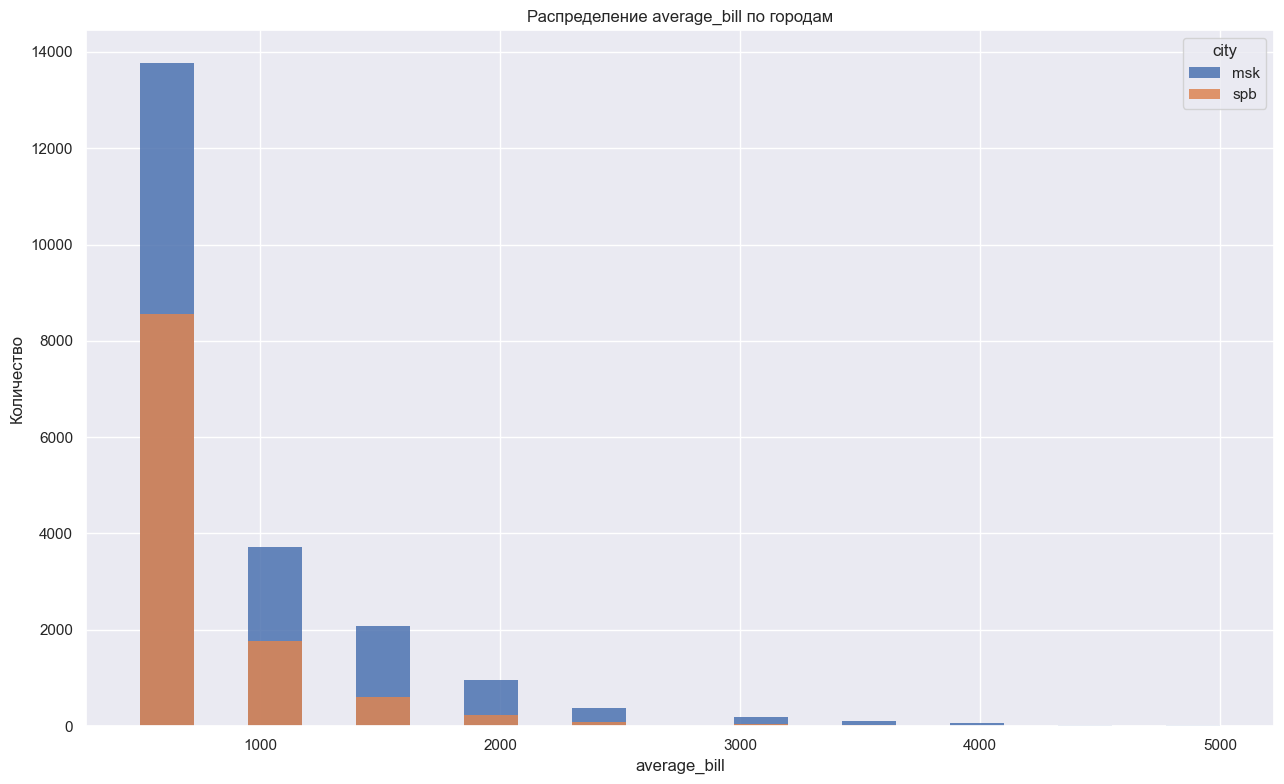

In [231]:
xcol = "average_bill"

# очистка
df = df.dropna(subset=[xcol]).copy()
df[xcol] = pd.to_numeric(df[xcol], errors='coerce')

# ограничим диапазон, чтобы хвосты не сжимали график
df_1 = df[df[xcol] <= 5000]


group = df_1.groupby(["city", xcol]).size().reset_index(name="count")
group = group[group["count"] > 5]
bins = max(group[xcol].count(), 20)

# общие границы бинов для всех городов
edges = np.linspace(df_1[xcol].min(), df_1[xcol].max(), bins+1)
# edges = np.linspace(df_1[xcol].min(), df_1[xcol].max(), bins + 1)

plt.figure(figsize=(13, 8))
for city, d in (df_1.groupby("city")):
    plt.hist(
        d[xcol], 
        bins=edges,
        alpha=0.85,
        edgecolor="none",           # без белых «зазоров»
        label=city,
        density=False
    )

plt.xlabel("average_bill")
plt.ylabel("Количество")
plt.title("Распределение average_bill по городам")
plt.legend(title="city")
plt.tight_layout()
plt.show()

Мы что-то поняли про признаки, которыми нам предстоит пользоваться. Теперь время посмотреть на таргет. Вооружившись функциями ``hist`` и ``scatter`` из библиотеки ``matplotlib``, а также методом ``isna`` для pandas-таблиц разберитесь, какие значения принимают таргеты, есть ли там там выбросы, пропуски или ещё какие-то проблемы.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>Среди таргетов довольно много пропусков;</li>
      <li>Все таргеты - это числа, кратные 500;</li>
      <li>Есть какие-то адские значения, превышающие 100 000 (видимо, выбросы);</li>
      <li>В целом, число ресторанов с данным средним чеком быстро падает с ростом среднего чека. Для средних чеков, больших 2500, заведений уже совсем мало. Примерно у 2/3 заведений средний чек 500.</li>
    </ol>
</details>

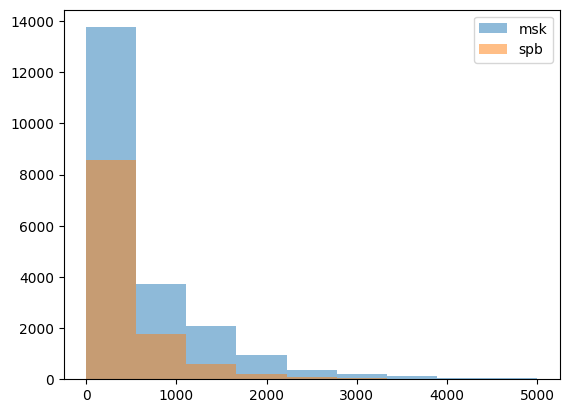

**Базовая очистка данных**

Раз есть треш, давайте чистить данные.

С пропусками можно бороться по-разному (даже и с пропусками в таргете), но пока мы сделаем самую простую вещь: дропнем все заведения, для которых мы не знаем средний чек.

Уберите из них все заведения, у которых средний чек неизвестен или превышает 2500. Пока есть опасение, что их слишком мало, чтобы мы смогли обучить на них что-нибудь.

**3. Введите в Контест количество заведений, которое у вас получилось после очистки**.

Дальше мы будем работать с очищенными данными.

In [232]:
df = pd.read_csv('organisations.csv')
xcol = "average_bill"
df = df.dropna(subset=[xcol]).copy()
df = df[df[xcol] <= 2500].copy()
df["org_id"].count()

32136

**4. Посчитайте и введите в Контест разность между средними арифметическими average_bill в кафе Москвы и Санкт-Петербурга. Округлите ответ до целого.**

&nbsp;

<details>
  <summary>Небольшая подсказка</summary>
  Примените часто используемый метод groupby.
</details>

In [233]:
# Здесь важно конкретно, что в кафе, а не во всех заведениях
group_mean = df[df["rubrics_id"].str.contains("30774")].groupby("city").mean()
diff = group_mean.loc["msk", "average_bill"] - group_mean.loc["spb", "average_bill"]
round(diff)

142

In [270]:
# group_mean

# example = group = df.groupby("city")["average_bill"].mean()
example_1 = group = df.groupby(["city", "rubrics_id"]).mean()

# print(example)
print(example_1)
print("__________________________________________________________________")
print(example_1.loc["msk", "average_bill"])
print("__________________________________________________________________")
print(example_1.loc["msk", "average_bill"].loc["30519"])
print("__________________________________________________________________")
print(example_1.loc["msk", "30519"]["average_bill"])

                                   org_id  average_bill    rating
city rubrics_id                                                  
msk  30519                   9.511017e+18    535.971223  4.087302
     30519 30770 30777       1.309305e+19    500.000000  3.974110
     30519 30771             9.005799e+18    500.000000  3.978562
     30519 30771 30774       1.113717e+19    500.000000  4.056678
     30519 30771 30776       1.303995e+19    500.000000  3.000000
...                                   ...           ...       ...
spb  3501750896 30771 31495  1.656240e+19    500.000000  5.000000
     3501750896 30774        7.983077e+17    500.000000  4.142857
     3501750896 30774 31495  9.136437e+18    500.000000  4.566123
     3501750896 31495        9.383776e+18    500.000000  4.494567
     3501750896 31495 30774  6.919997e+18    500.000000  3.666667

[997 rows x 3 columns]
__________________________________________________________________
rubrics_id
30519                            535.971

In [235]:
# Разница между средними чеками в Москве и Санкт-Петербурге
group = df.groupby("city").mean()
diff_1 = group.loc["msk", "average_bill"] - group.loc["spb", "average_bill"]
round(diff_1)

116

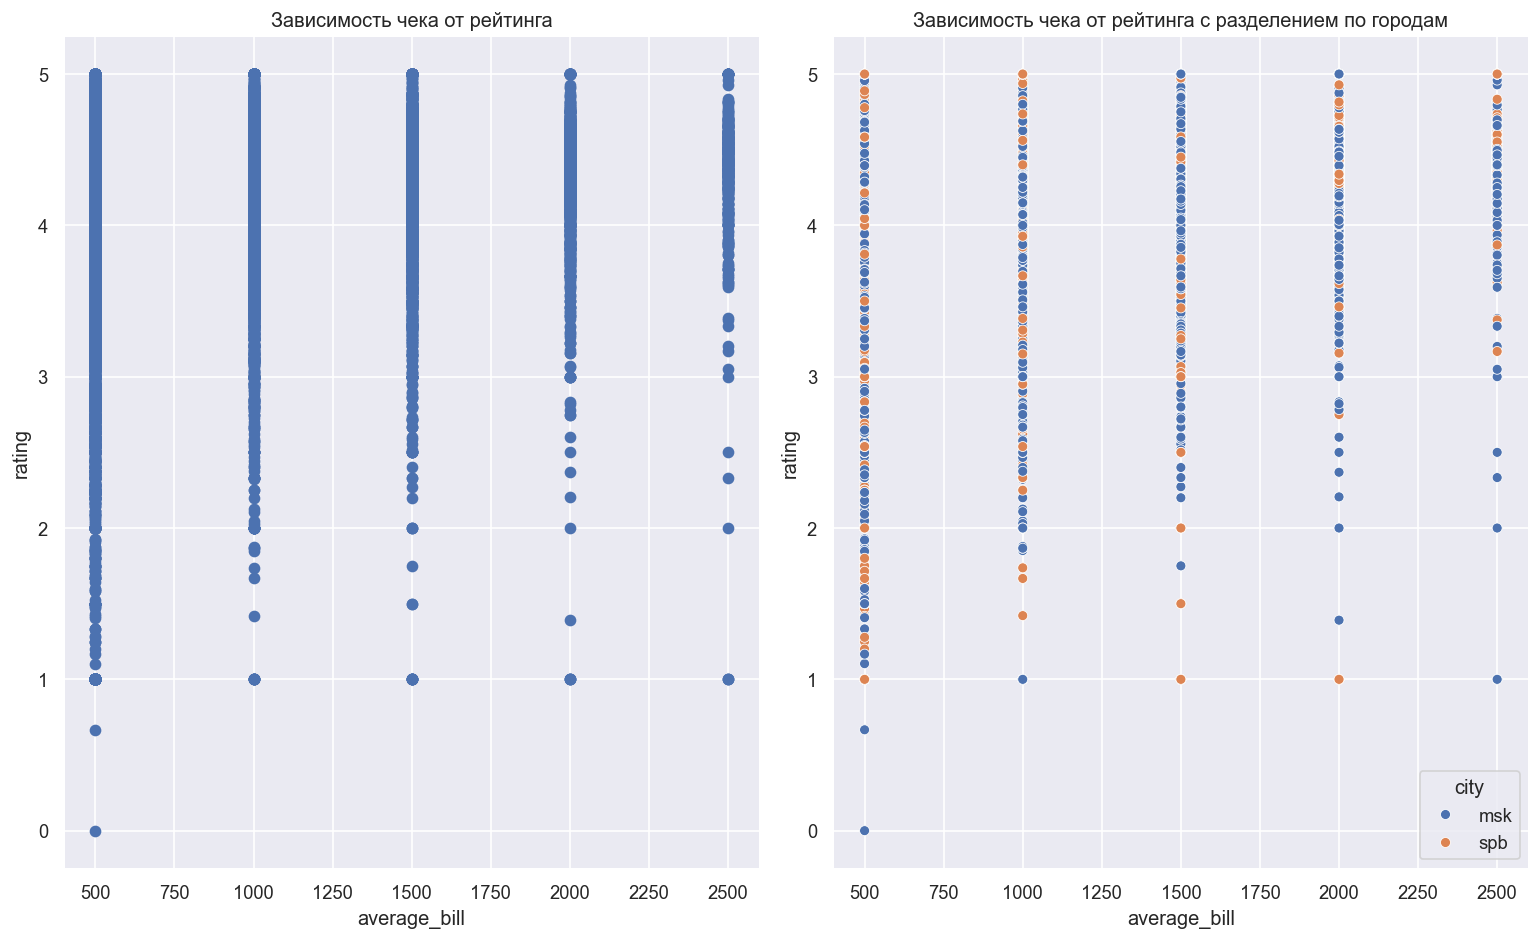

In [236]:
# Корреляция чека и рейтинга двумя способами
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

fig, ax = plt.subplots(1, 2, figsize=(13, 8), dpi=120)
ax[0].scatter(df["average_bill"], df["rating"])
sns.scatterplot(
    data=df,
    x="average_bill",
    y="rating",
    hue="city",
    ax=ax[1]
)

ax[0].set_xlabel("average_bill")
ax[0].set_ylabel("rating")
ax[0].set_title(u"Зависимость чека от рейтинга")
ax[1].set_title(u"Зависимость чека от рейтинга с разделением по городам")
ax[1].legend(title="city", loc="best")
fig.tight_layout()
plt.show()

In [237]:
# Корреляция чека и рейтинга двумя способами
pearson = df[["average_bill", "rating"]].corr(method="pearson").loc["average_bill", "rating"]
spearman = df[["average_bill", "rating"]].corr(method="spearman").loc["average_bill", "rating"]
print(f"Pearson: {pearson:.3f}\nSpearman: {spearman:.3f}")

Pearson: 0.090
Spearman: 0.096


In [238]:
rest_mean = (
    df[df["rubrics_id"].str.contains("30776")]["average_bill"]
    .mean()
)

pub_mean = (
    df[df["rubrics_id"].str.contains("30770")]["average_bill"]
    .mean()
)

diff = rest_mean - pub_mean
diff

181.2283246610557

In [239]:
top_bills = df["average_bill"].round(0).value_counts().head(6).index.to_list()
top_bills

[500.0, 1000.0, 1500.0, 2000.0, 2500.0]

Задание 1:
Значение теста Манна-Уитни: 131006630.0
P-value в тесте Манна-Уитни: 2.3824996476020733e-98


Задание 2:



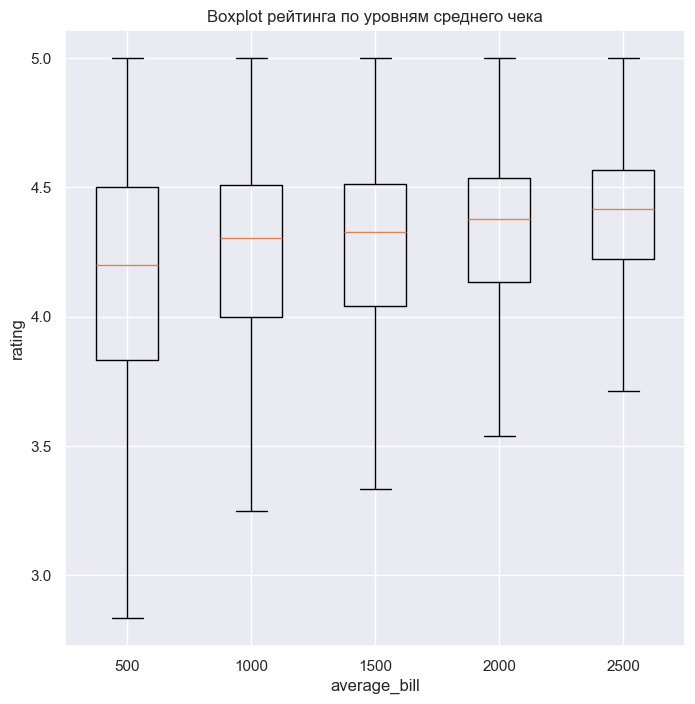

Задание 3:
Значение теста Манна-Уитни: 17237079.0
P-value в тесте Манна-Уитни: 1.954741490901783e-147




In [240]:
# Подсчет всех статистистик6 предлагаемых в ответе:
# Считаем тест Манна Уитни и делаем выводы:

from scipy.stats import mannwhitneyu

##### Задача 1 #####
# Н0: между группами нет статистически значимых отличий
x = df[df["city"] == "msk"]["average_bill"]
y = df[df["city"] == "spb"]["average_bill"]
U, p = mannwhitneyu(x, y, alternative="two-sided", method="auto")
print(f"Задание 1:\nЗначение теста Манна-Уитни: {U}\nP-value в тесте Манна-Уитни: {p}\n\n")
#  мы получили p-value << 0.001 -> Отвергаем Н0 на всех уровнях значимости
# -> в ресторанах Москвы чек значимо выше

##### Задача 2 #####
# нужно построить ящик с усами для зависимости рейтинга от среднего чека
# для этого нужно получить группы рейтингов для каждого чека:
# получим для начала список наиболее популярных средних чеков, для которых и будем строить распредление:
top_bills = df["average_bill"].round(0).value_counts().head(6).index.to_list()
# сделаем группы рейтингов для каждого чека. С помощью values превратим эти списки в numpy.ndarray
groups = [df.loc[
          df["average_bill"].round(0) == v, "rating"].dropna().values for v in top_bills
         ]

plt.figure(figsize=(8, 8))
# str(int(v)) в labels нужно, чтобы у чисел в подписях не было знаков типа .0
# showfliers отвечает за то, нужно ли показывать выбросы
plt.boxplot(groups, labels=[str(int(v)) for v in top_bills], showfliers=False)
plt.ylabel("rating"); plt.xlabel("average_bill"); plt.title(u"Boxplot рейтинга по уровням среднего чека")
print("Задание 2:\n")
plt.show()
# из графиков видно, что распределение рейтингов сдвигается выше при бОльших значениях чека, но не значительно

##### Задача 3 #####
# Сравним с помощью Манна-Уитни средний чек в ресторанах и пабах:
# Сделаем соберем средние чеки в ресторанах (+ не пабах) и наоборот 
rests = df[(df["rubrics_id"].astype(str).str.contains("30776")) & ~(df["rubrics_id"].astype(str).str.contains("30770"))]["average_bill"]
pubs = df[(df["rubrics_id"].astype(str).str.contains("30770")) & ~(df["rubrics_id"].astype(str).str.contains("30776"))]["average_bill"]
U, p = mannwhitneyu(rests, pubs, alternative="two-sided", method="auto")
print(f"Задание 3:\nЗначение теста Манна-Уитни: {U}\nP-value в тесте Манна-Уитни: {p}\n\n")
#  мы получили p-value << 0.001 -> Отвергаем Н0 на всех уровнях значимости
# -> в ресторанах чек значимо выше, чем в пабах

Давайте ещё немного поизучаем данные. Ответьте на вопросы:

1. Есть ли разница между средними чеками в Москве и Санкт-Петербурге?
2. Коррелирует ли средний чек с рейтингом?
3. Есть ли разница в среднем чеке между ресторанами и пабами (см. соответствующие типы из ``rubrics``)?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    <ol>
      <li>В целом, да. Вы могли бы сравнить средние (в Москве больше) или медианы (они равны, потому что уж больно много где средний чек 500). Этого, конечно, мало для того, чтобы сделать вывод. Нужно проверять какие-то статические критерии, которые изучаются в курсе по статистике. Не будем останавливаться на этом подробно. Поскольку данные совсем не нормальные, никакой t-тест не сработает; мы бы предложили использовать критерий Манна-Уитни (см. википедию и функцию mannwhitneyu из библиотеки scipy.stats).</li>
      <li>Какая-то корреляция между ними есть но уж больно неубедительная (рекомендуем построим на одном графике boxplot рейтинга по каждому значению среднего чека для визуализации). Конечно, дна становится меньше с ростом среднего чека, но, видимо, в предсказании это особо не используешь;</li>
      <li>Несомненно, в ресторанах средний чек выше. Это и невооружённым глазом видно, и с помощью критерия Манна-Уитни можно проверить.</li>
    </ol>
</details>

## Формулируем задачу

Прежде, чем решать задачу, её надо сформулировать.

**Вопрос первый**: это классификация или регрессия? Подумайте над этим.

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    Ответ не столь однозначен, как хотелось бы. С одной стороны, таргет принимает всего четыре значения, и потому это может быть классификацией с 4 классами. С другой стороны, таргеты - это не абстрактные "треугольник", "круг", "квадрат", а вещественные числа, и когда мы вместо 500 предсказываем 2500, это явно хуже, чем вместо 1500 предсказать 2000. В целом, задачу можно решать и так, и так; мы будем смотреть на метрики обеих задач.
</details>

**Вопрос второй**: какие метрики мы будем использовать для оценки качества решения? Какие метрики вы предложили бы для этой задачи как для задачи классификации? А для этой задачи, как для задачи регрессии?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Начнём с классификации. Метрика accuracy не очень хороша из-за несбалансированности классов. Действительно, классификатор, который всегда говорит 500, будет иметь accuracy примерно 0.66, хотя это никак не отражает практическую ценность модели. Как мы увидим, самая большая проблема будет заключаться в том, чтобы научиться выделять заведения с большими чеками, а их меньше всего и в accuracy они вносят самый маленький вклад. Есть разные способы с этим бороться, один -- использовать sklearn.metrics.balanced_accuracy_score. Его идея, грубо говоря, в том, чтобы по каждому классу найти, какая доля объектов этого класса правильно классифицирована, а потом эти доли усреднить. Тогда у бессмысленного классификатора, который всем ставит 500, будет скор 1/5 (ведь классов 5), а чтобы получить прежние 2/3, нужно будет научиться в каждом классе правильно ставить хотя бы 2/3 меток.    
    
    Теперь что касается регрессии. Основых метрики две - MSE и MAE. Из первой стоит извлекать корень, чтобы получать интерпретируемые человеком значения, а вторая менее агрессивна к выбросам (впрочем, выбросов тут уже нет, мы их все выкинули). Без дополнительной информации не очень понятно, какую выбирать, можно брать любую. А выбирать надо: ведь даже банальные модели "предсказывай всегда среднее" и "предсказывай всегда медиану" будут по-разному ранжироваться этими метриками.
    
</details>

**Вопрос третий**: а не взять ли нам какую-нибудь более экзотическую метрику? Например, MAPE (определение в учебнике в главе про оценку качества моделей). А как вам такое соображение: допустим, заказчик говорит, что пользователи будут расстраиваться, только если мы завысили средний чек - так давайте поправим MSE или MAE, обнуляя те слагаемые, для которых предсказанный таргет меньше истинного. Вот это хорошая метрика или нет?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
    Что касается MAPE, у нас нет тех проблем, с которой она борется. Вот если бы у нас были средние чеки от 500 до миллиона, мы бы столкнулись с ситуацией, что большие ошибки для больших чеков доминировали бы в сумме для MSE и MAE (500 вместо 1000 меркнет по сравнению с 500к вместо миллиона). Говоря поэтически, мы бы оптимизировали модель для миллионеров, забыв про простых трудяг. И было бы логично перейти от парадигмы "ошибаемся на 500 рублей" к парадигме "ошибаемся на 50%". Но у нас все таргеты примерно одного порядка, MAPE нам особо ни к чему.
    
    Вторая метрика коварна тем, что её можно "накрутить" безо всякой пользы для дела. А именно, модель, которая всегда предсказывает средний чек в миллион, была бы идеальна. Но все бы расстраивались и не ходили есть. Другое дело, что можно ввести разные веса для ошибок в большую и в меньшую сторону, но опять же - пока нет показаний к тому, что это нужно.
    
</details>

## Применяем ML

Теперь время разбить данные на обучающую и тестовую выборку. Делается это с помощью функции ``train_test_split`` из пакета ``sklearn``. При этом очень важно сделать две вещи:

* Зафиксировать ``random_state=42`` (да, именно этот, а то ваши модели могут не зайти в Контест), чтобы всё, что мы делаем, было воспроизводимо (иначе от перезапуска к перезапуску числа могут меняться, и мы не будем понимать, из-за чего это происходит).
* Сделать стратификацию по таргету. В противном случае у нас в трейне и тесте могут оказаться разные пропорции классов (обычно особенно страдают мало представленные классы), что неутешительно скажется на результате.

**Обратите внимание**, что если вы побьёте выборку на train и test по-другому, ваши результаты могут не зайти в контест.

In [241]:
clean_data = df.copy()
# Стратификация - это сохранение соотношения классов в тестовой и тренировочной выборке
clean_data_train, clean_data_test = train_test_split(
    clean_data, stratify=clean_data['average_bill'], test_size=0.33, random_state=42)

Теперь нам нужен **бейзлайн** - очень простая модель, с которой мы в дальнейшем будем сравниваться.

Поскольку мы ещё не знаем никаких умных классов моделей, все модели мы будем писать руками. А именно, мы напишем две простых модели на основе ``sklearn.baseRegressorMixin`` и ``sklearn.base.ClassifierMixin`` (посмотрите примеры в документации sklearn и сделайте так же):

* Модель для задачи регрессии, которая для всех заведений предсказывает одно число — среднее значение среднего чека;
* Модель для задачи классификации, которая для всех заведений предсказывает один класс — самый частый класс (ироничным образом он в данном случае совпадает с медианой).

**Важно!** Мы будем много раз повторять вам мантру о том, что **информация из тестовой выборки не должна протекать в процесс обучения**. Так вот, и среднее, и самый частый класс вы должны считать именно на обучающей выборке!

**5 и 6. Напишите эти две модели и сдайте в Контест**. В процессе проверки модели будут и обучаться, и предсказывать.

Заметим, что для этих моделей нам вообще не нужны какие-то "фичи"; мы работаем только с таргетом.

У каждой модели есть (как минимум) два метода: `fit` (обучает модель по фичам `X` и таргету `y`) `predict` (предсказывает по фичам `X`)

In [242]:
from scipy.stats import mode
from sklearn.base import RegressorMixin

class MeanRegressor(RegressorMixin):
    # Predicts the mean of y_train
    def fit(self, X=None, y=None):

        self.mean_ = float(np.mean(y))
        return self

    def predict(self, X=None):

        n_samples = X.shape[0]
        return np.full(shape=n_samples, fill_value=self.mean_)

from sklearn.base import ClassifierMixin

class MostFrequentClassifier(ClassifierMixin):
    # Predicts the rounded (just in case) median of y_train
    def fit(self, X=None, y=None):

        self.mode_ = mode(y)[0]
        return self

    def predict(self, X=None):

        n_samples = X.shape[0]
        return np.full(shape=n_samples, fill_value=self.mode_)

In [243]:
city_msk = lambda x: 1 if x == "msk" else 0
city_spb = lambda x: 1 if x == "spb" else 0
city_msk.__name__ = "msk"
city_spb.__name__ = "spb"
clean_01 = clean_data_test["city"].transform([city_msk, city_spb])
clean_y = (clean_data_test["average_bill"] * clean_01["msk"])
# clean_y[clean_y != 0]
clean_y

65841       0.0
48882     500.0
33711     500.0
33544    2000.0
35293       0.0
          ...  
55337    2500.0
64048    1000.0
22010    2000.0
40089     500.0
32180       0.0
Length: 10605, dtype: float64

Обучим наши модели

Обучите модели и оцените их качество на тестовой выборке. В качестве метрик возьмём RMSE (``np.sqrt`` от ``sklearn.metrics.mean_squared_error``) и ``sklearn.metrics.balanced_accuracy_score``.

Для регрессионной модели имеет смысл считать только RMSE (значения будут не кратны 500, точно мы угадывать не будем никогда), а вот для классификационной можно найти обе метрики. Сделайте это. Какая модель оказалась лучше по RMSE?

In [244]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

reg = MeanRegressor()
reg.fit(y=clean_data_train['average_bill'])

clf = MostFrequentClassifier()
clf.fit(y=clean_data_train['average_bill'])

X_predict = clean_data_test.drop(columns=["average_bill"])
y_true = clean_data_test["average_bill"]

y_pred_reg = reg.predict(X=X_predict)
y_pred_clf = clf.predict(X=X_predict)

MSE_reg = round(np.sqrt(mean_squared_error(y_true, y_pred_reg)), 1)
MSE_clf = round(np.sqrt(mean_squared_error(y_true, y_pred_clf)), 1)
bal_acc_clf = balanced_accuracy_score(y_true, y_pred_clf)

print(f"MSE_reg: {MSE_reg}\nMSE_clf: {MSE_clf}\nAccurancy: {bal_acc_clf}")

MSE_reg: 448.7
MSE_clf: 514.8
Accurancy: 0.2


<details>
  <summary>Когда будете готовы, кликните сюда</summary>
    
  Казалось бы, регрессор никогда не угадывает, но он в каком-то смысле лучше классификатора - справедливо ли это? Возможно. Несуществующий пользователь модели вряд ли будет задавать вопросы "почему средний чек не кратен 500?" Ну, выдали около 800 - ок, понятно.
    
</details>

## Усложнение модели

Бейзлайны будут нашей отправной точкой. Строя дальнейшие модели, мы будем спрашивать себя: получилось ли лучше бейзлайна? Если нет или если не особо, то в чём смысл усложнения?

Начнём с использования фичи ``city``. Мы уже видели, что в разных городах и средние чеки разные. Легко проверить, что *медиана* средних чеков всё же одна и та же и в Москве, и в Санкт-Петербурге (ох уж этот вездесущий средний чек 500!), поэтому с классификатором мы ничего не сделаем. Но вот регрессор можно попробовать починить.

**7. Напишите регрессор, для каждого заведения предсказывающий среднее значение в том же городе (на обучающей выборке, конечно) и сдайте его в Контест**. Вам может помочь то, что булевы `pandas` и `numpy` столбцы можно умножать на численные — в такой ситуации False работает, как ноль, а True как единица.

In [248]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class CityMeanRegressor(RegressorMixin):
    def fit(self, X=None, y=None):
        X["average_bill"] = y
        means = X.groupby("city")["average_bill"].mean()

        self.mean_msk_ = means.loc["msk"]
        self.mean_spb_ = means.loc["spb"]
        
        return self

    def predict(self, X=None):
        return X["city"].map({"msk": self.mean_msk_, "spb": self.mean_spb_}).to_numpy()

Обучите регрессор и сравните его по метрике RMSE с бейзлайнами. Получилось ли улучшить метрику?

In [249]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

reg = CityMeanRegressor()
reg.fit(X=clean_data_train.drop(columns=["average_bill"]), y=clean_data_train['average_bill'])

X_predict = clean_data_test.drop(columns=["average_bill"])
y_true = clean_data_test["average_bill"]

y_pred_reg = reg.predict(X=X_predict)

MSE_reg = round(np.sqrt(mean_squared_error(y_true, y_pred_reg)), 1)

print(f"MSE_reg: {MSE_reg}")

MSE_reg: 445.1


Лучше стало, но, правда, не очень сильно. В этот момент очень важно не просто радовать руководителя приростом в третьем знаке, но и думать о том, что происходит.

Средний средний чек по Москве равен 793, в Санкт-Петербурге - 676, а в целом - 752 рубля. MSE, увы, не поможет вам ответить на вопрос, стало ли лучше пользователю, если вы ему вместо 752 рублей назвали 793. Здесь вскрывается весьма существенный порок MSE в этой задаче. Дело в том, что наш изначальный таргет делит заведения на некоторые "ценовые категории", и различие в средних чеках 500 и 1000 в самом деле существенно. Наверное, мы хотели бы как раз правильно предсказывать ценовые категории. Но MSE не очень помогает нам об этом судить. Дальше мы ещё подумаем, как это исправить.

В любом случае, несмотря на улучшение метрики, мы пока не можем судить, стало ли по жизни лучше от усложнения модели.

Поручинившись немного, возьмём на вооружение другую идею. Давайте использовать типы заведений!

Но с типами есть некоторая проблема: в столбце ``rubrics_id`` не всегда один идентификатор, часто их несколько, и всего комбинаций довольно много. Чтобы не возиться с малочисленными типами, давайте сольём их в один безликий ``other``.

Итак, добавьте в обучающие и тестовые данные столбец ``modified_rubrics``, в котором будет то же, что и в ``rubrics_id``, если соответствующая комбинация рубрик содержит хотя бы 100 заведений из обучающей (!) выборки, и строка ``other`` в противном случае.

Здесь вам поможет контейнер ``Counter`` из библиотеки ``collections``.

In [336]:
rubrics_cnt = clean_data_train.groupby("rubrics_id").size().reset_index(name="rubrics_count")
rubrics_cnt = rubrics_cnt[rubrics_cnt["rubrics_count"] >= 100]

mask = clean_data_test["rubrics_id"].isin(rubrics_cnt["rubrics_id"])
clean_data_test["modified_rubrics"] = clean_data_test["rubrics_id"].where(mask, "other")

mask = clean_data_train["rubrics_id"].isin(rubrics_cnt["rubrics_id"])
clean_data_train["modified_rubrics"] = clean_data_train["rubrics_id"].where(mask, "other")

clean_data_train

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics
45769,3276960721840719260,msk,500.0,4.500000,30770,11704 20422 1018 11177 1416 11867 10462,30770
39061,8452997364765928283,msk,1500.0,4.442623,30774 30776,1415 3501481355 1416 11629 10462 1524 20422 11...,30774 30776
59281,14240408259222214074,spb,1000.0,4.018868,30776 30774,3502045032 11741 3502045016 10462 11704 350177...,30776 30774
51225,15114069072602161053,msk,1500.0,4.364742,31401 30776,3501513153 3501779478 3491142672 273469383 350...,other
29587,2730337118800634815,msk,1000.0,4.698718,30770,21247 10896 3491142672 11629 3501481353 350148...,30770
...,...,...,...,...,...,...,...
64667,15641319025413596274,msk,500.0,4.510753,30771,20424 3501744275 273469383 10462 11177 11617 1...,30771
47309,2049892259403324519,msk,500.0,4.333333,30771,273469383 20424 11704 11629 10462 20422 1018,30771
26208,12224074314753892871,msk,500.0,5.000000,30775,21247 11867 11629 1524 1509 20422 1416 1415 10...,30775
48599,16581456988770474074,msk,500.0,4.692308,31495 30774,3491142672 20282 3501637468 11741 3501745827 3...,31495 30774


In [337]:
ex = clean_data_test.copy()
# ex["city_numb"] = clean_data_train["city"].map({"msk": 1, "spb": 0})

ex_1 = clean_data_train.copy()
ex_2 = ex.groupby(["modified_rubrics", "city"])["average_bill"].median()

ex_3 = ex.merge(ex_2, how="left", on=["modified_rubrics", "city"])
# ex_3[["modified_rubrics", "average_bill_y"]]
# ex_3["city_numb"].map({1: "msk", 0: "spb"})
ex_3

,org_id,city,average_bill_x,rating,rubrics_id,features_id,modified_rubrics,average_bill_y
0,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,11177 3501618484 10462 3501481355 1509 1416 20...,other,500.0
1,16695436192794975203,msk,500.0,3.793758,30771,3501744275 273469383 3501513153 11617 10462 11...,30771,500.0
2,11841431940065207518,msk,500.0,3.606557,30771 30777,3501773763 3501744275 3501773764 3501618484 15...,other,500.0
3,16028521499441205186,msk,2000.0,4.683841,30776,3501618484 20422 1082283206 11704 11629 21247 ...,30776,1500.0
4,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,1524 246 11704 1018 3501618484 2020795524 2124...,other,500.0
...,...,...,...,...,...,...,...,...
10600,9041226080397910513,msk,2500.0,4.408108,30776,11629 11704 10462 11617 3501744275 20424 35017...,30776,1500.0
10601,14998683880343589209,msk,1000.0,3.555556,30776,273469383 20424 20422 246 1416 11867 11629 104...,30776,1500.0
10602,1621254442333414922,msk,2000.0,4.402516,30776,273469383 21247 11867 1082283206 20422 246 101...,30776,1500.0
10603,5620614742257813954,msk,500.0,NaN,30771,11704 1018 273469383 10462 20422,30771,500.0


Теперь настало время написать могучий классификатор, который по заведению предсказывает медиану средних чеков среди тех в обучающей выборке, у которых с ним одинаковые `modified_rubrics` и город (вы спросите, почему медиану, а не самый частый -- спишем это на вдохновение; самый частый тоже можно брать - но медиана работает лучше).

**8. Напишите классификатор и сдайте в Контест**.

In [338]:
class RubricCityMedianClassifier():
    
    def fit(self, X=None, y=None):
        X["average_bill"] = y["average_bill"]
        X["city"] = y["city"]

        X["city_numb"] = X["city"].map({"msk": 1, "spb": 0})

        self.med_bill_ = X.groupby(["modified_rubrics", "city"])["average_bill"].median()
        self.med_city_ = X.groupby("modified_rubrics")["city_numb"].median()

        return self

    def predict(self, X=None):
        X = X.merge(self.med_bill_, how="left", on="modified_rubrics")
        X = X.merge(self.med_city_, how="left", on="modified_rubrics")

        X["city_numb"] = X["city_numb"].map({1: "msk", 0: "spb"})
        
        return X["average_bill"]


In [446]:
# class RubricCityMedianClassifier():
    
#     def fit(self, X=None, y=None):
#         X["average_bill"] = y
#         self.med_bill_ = X.groupby(["modified_rubrics", "city"])["average_bill"].median()

#         return self

#     def predict(self, X=None):
#         X = X.merge(self.med_bill_, how="left", on=["modified_rubrics", "city"])
        
#         return X["average_bill"]

import pandas as pd
import numpy as np

class RubricCityMedianClassifier():
    
    def fit(self, X=None, y=None):
        df = pd.DataFrame(X).copy()
        df["average_bill"] = np.asarray(y, dtype=float)
        self.med_bill_ = df.groupby(["modified_rubrics", "city"])["average_bill"].median().reset_index()

        return self

    def predict(self, X=None):
        X_df = X.copy()
        out = X_df.merge(
            self.med_bill_,
            how="left", 
            on=["modified_rubrics", "city"]
        ).set_index(X_df.index)

        return out["average_bill"]

In [447]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

X_train = clean_data_train.drop(columns=["average_bill"])
y_train = clean_data_train["average_bill"]
# print(y_train)

clf = RubricCityMedianClassifier()
clf.fit(X=X_train, y=y_train)

X_predict = clean_data_test.drop(columns=["average_bill"])
y_true = clean_data_test["average_bill"]

y_pred_clf = clf.predict(X=X_predict)

MSE_clf = round(np.sqrt(mean_squared_error(y_true, y_pred_clf)), 1)
bal_acc_clf = balanced_accuracy_score(y_true, y_pred_clf)

print(f"MSE_clf: {MSE_clf}\nAccurancy: {bal_acc_clf}")
# print(y_true)

MSE_clf: 394.0
Accurancy: 0.30552511833185647


Сравните обученный классификатор по метрикам RMSE и balanced_accuracy_score с нашими бейзлайнами. Получилось ли улучшить?

Обратите внимание что рост accuracy по сравнению с бейзлайном при этом на порядок меньше:

accuracy_score

Predict most frequent:  0.6947666195190948

Predict by rubric and city:  0.7095709570957096

Для диагностики напечатайте для каждого класса тестовой выборки, сколько в нём объектов и скольким из них наш классификатор приписал правильный класс. Что вы видите?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
    
  Вы, вероятно, видите то, что мы стали однозначно лучше по сравнению с бейзлайном детектировать средний чек 1000 и 1500 (хотя всё равно не очень хорошо + ценой ухудшения качества на среднем чеке 500), а вот чеки 2000 и 2500 нам ну никак не даются.
    
</details>

In [360]:
import numpy as np
import pandas as pd

# y_true — истинные метки классов (Series/array)
# y_pred — предсказанные метки классов (Series/array)

y_true = pd.Series(y_true)
y_pred = pd.Series(y_pred_clf)  # ваш классификатор

# убедимся, что сравниваем однотипные значения (строки/числа)
# y_true = y_true.astype(str); y_pred = y_pred.astype(str)

df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})
per_class = (
    df.assign(correct=lambda d: (d["y_true"] == d["y_pred"]).astype(int))
      .groupby("y_true")
      .agg(n_samples=("y_true", "size"), n_correct=("correct", "sum"))
      .assign(acc=lambda d: d["n_correct"] / d["n_samples"])
      .sort_values("n_samples", ascending=False)
)

print(per_class)

        n_samples  n_correct       acc
y_true                                
500.0        7368        390  0.052932
1000.0       1809         26  0.014373
1500.0        890          4  0.004494
2000.0        391          0  0.000000
2500.0        147          0  0.000000


**Кстати**. А вы понимаете, почему приведённый выше пайплайн классификации был не очень удачным с точки зрения архитектуры? Почему его было бы правильнее воплотить по-другому?

&nbsp;

<details>
  <summary>Когда будете готовы, кликните сюда, чтобы посмотреть ответ</summary>
Собственно говоря, и не было никакого пайплайна. К счастью, у нас была одна обучающая выборка, мы на ней посчитали список рубрик для modified_rubrics и радовались жизни. Но если бы нам надо было переобучать всё на новых данных, пришлось бы помнить, что их надо везде пересчитать (ведь у нас могли появиться новые рубрики с хотя бы 100 представителями). А уж никакую кросс-валидацию (кто знает - тот поймёт) с нашим подходом к делу и вовсе бы не получилось сделать без боли.
    
Поэтому в следующей лабораторной вы научитесь делать честные пайплайны, в которых преобразование данных, генерация фичей и обучение классификатора будут объединены в один понятный процесс, происходящий на этапе fit.
</details>

## Слишком простые и слишком сложные модели

Бейзлайны у нас слишком просты и потому не очень полезны в жизни. Но если сложность модели растёт бесконтрольно, то тоже получается плохо.

Давайте рассмотрим конкретный пример. Создадим классификатор, использующий одновременно `rubrics_id` и `features_id`.

Сделайте следующее:

- для каждого объекта обучающей выборки сконкатенируйте строку `rubrics_id` с разделителем (например, буквой 'q') и содержимым `features_id`. Полученный столбец озаглавьте `modified_features`. Это не самый клёвый способ заиспользовать все фичи, но сейчас пока сойдёт. Причём на сей раз не будем выкидывать мало представленные значения (вся информация важна, не так ли?).
- при этом для тестовой выборке заменяйте на строку `other` все конкатенации, которые не встретились в обучающей выборке.

То есть элементы в этом столбце будут иметь вид `other` или `30776 30774 q 3502045032 11741 3502045016 1046...`.

In [375]:
clean_data_train["modified_features"] = clean_data_train["rubrics_id"].astype(str) + " q " + clean_data_train["features_id"].astype(str)

mask = (clean_data_test["rubrics_id"].astype(str) + " q " + clean_data_test["features_id"].astype(str)).isin(clean_data_train["modified_features"])
clean_data_test["modified_features"] = (
    (clean_data_test["rubrics_id"].astype(str) + " q " + clean_data_test["features_id"].astype(str))
    .where(mask, "other")
)

clean_data_test.head(5)

,org_id,city,average_bill,rating,rubrics_id,features_id,modified_rubrics,modified_features
65841,14385912302763770021,spb,1000.0,4.748444,30776 30770 31401,11177 3501618484 10462 3501481355 1509 1416 20...,other,other
48882,16695436192794975203,msk,500.0,3.793758,30771,3501744275 273469383 3501513153 11617 10462 11...,30771,other
33711,11841431940065207518,msk,500.0,3.606557,30771 30777,3501773763 3501744275 3501773764 3501618484 15...,other,other
33544,16028521499441205186,msk,2000.0,4.683841,30776,3501618484 20422 1082283206 11704 11629 21247 ...,30776,other
35293,12477116204055673498,spb,500.0,4.165394,30776 31401 30770,1524 246 11704 1018 3501618484 2020795524 2124...,other,other


Теперь обучите классификатор, который для заведения предсказывает медиану среднего чека по всем объектам тестовой выборки с таким же, как у него, значением `modified_features`, а если такого в обучающей выборке нет, то глобальную медиану среднего чека по всей обучающей выборке.

**9. Загрузите в Контест предсказания этого классификатора на тестовой выборке**

Мы ждём файла **.csv**, у которого в каждой строке будет только одно число - предсказание классификатора.

Возможно, вам будет полезна библиотека ``tqdm``, позволяющая отслеживать в реальном времени, сколько времени уже крутится цикл и сколько итераций ещё осталось. Впрочем, если вы всё написали нормально, то должно работать не очень долго.

In [431]:
class TrainClassifier:

    def fit(self, X=None, y=None):
        df = pd.DataFrame(X).copy()
        df["average_bill"] = np.asarray(y, dtype=float)
        
        self.feature_med_ = df.groupby("modified_features")[["average_bill"]].median()
        self.global_med_ = df["average_bill"].median()

        return self

    def predict(self, X=None):
        df_pred = X.merge(
            self.feature_med_, 
            how="left", 
            on="modified_features"
        ).set_index(X.index)
        
        df_pred.loc[df_pred["modified_features"] == "other", "average_bill"] = self.global_med_
        
        return df_pred["average_bill"]

In [455]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

X_train = clean_data_train.drop(columns=["average_bill"])
y_train = clean_data_train["average_bill"]

X_predict_test = clean_data_test.drop(columns=["average_bill"])
y_true_test = clean_data_test["average_bill"]

clf = TrainClassifier()
clf.fit(X=X_train, y=y_train)

y_pred_test = clf.predict(X=X_predict_test)

RMSE_test = round(np.sqrt(mean_squared_error(y_true_test.to_numpy(dtype=float), y_pred_test)), 2)
bal_acc_test = round(balanced_accuracy_score(y_true_test.to_numpy(dtype=float), y_pred_test), 2)

print(f"RMSE train: {RMSE_train}\nAccurancy train: {bal_acc_train}")

RMSE train: 32.42
Accurancy train: 0.99


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [456]:
pd.Series(y_pred_test).to_csv("preds.csv", header=False, index=True)

df = pd.read_csv("preds.csv")
# df

Модель, очевидно, очень сложная. Число параметров (различных категорий) в ней сопоставимо с числом объектов в обучающей выборке. А получилось ли хорошо?

Давайте посчитаем RMSE и balanced_accuracy_score на обучающей и на тестовой выборках.

**10. Введите их в Контест**

In [457]:
from sklearn.metrics import mean_squared_error, balanced_accuracy_score

X_train = clean_data_train.drop(columns=["average_bill"])
y_train = clean_data_train["average_bill"]

X_predict_test = clean_data_test.drop(columns=["average_bill"])
y_true_test = clean_data_test["average_bill"]

X_predict_train = clean_data_train.drop(columns=["average_bill"])
y_true_train = clean_data_train["average_bill"]

clf = TrainClassifier()
clf.fit(X=X_train, y=y_train)


y_pred_test = clf.predict(X=X_predict_test)
y_pred_train = clf.predict(X=X_predict_train)


RMSE_train = round(np.sqrt(mean_squared_error(y_true_train.to_numpy(dtype=float), y_pred_train)), 2)
bal_acc_train = round(balanced_accuracy_score(y_true_train.to_numpy(dtype=float), y_pred_train), 2)

RMSE_test = round(np.sqrt(mean_squared_error(y_true_test.to_numpy(dtype=float), y_pred_test)), 2)
bal_acc_test = round(balanced_accuracy_score(y_true_test.to_numpy(dtype=float), y_pred_test), 2)

print(f"RMSE train: {RMSE_train}\nAccurancy train: {bal_acc_train}\nRMSE test: {RMSE_test}\nAccurancy test: {bal_acc_test}")
# print(y_pred_clf.unique())
# print(y_true.unique())

RMSE train: 32.42
Accurancy train: 0.99
RMSE test: 513.99
Accurancy test: 0.2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Налицо переобучение: на трейне метрики отличные, на тесте - вообще никакие

В общем, не гонитесь за чрезмерной сложностью модели..

## ML без данных что компутер без электричества

Возможно, вы смотрите на полученные выше результаты и думаете: вот если бы мы не какие-то убогие медианы предсказывали, а гоняли бы нейросети, то тут-то бы всё и получилось!

Но, увы, совсем даже не всегда от счастья нас отделяет выбор хорошей модели (и стратегии обучения). Если данные не очень, то даже самая крутая модель не сработает. В этой ситуации нужно либо добывать новые фичи каким-то образом, либо собирать новые данные (увеличивать датасет), либо просто бросать задачу.

Давайте посмотрим, что выжмет из наших данных одна из самых мощных моделей для табличных данных - градиентный бустинг на решающих деревьях в исполнении [CatBoost](https://catboost.ai/).

Но прежде, чем сделать fit, нам надо облагородить данные. Несмотря на то, что CatBoost отлично работает с категориальными фичами, мешок признаков из `rubrics_id` или `features_id` может ему оказаться не по зубам. Поэтому мы соберём датасет в пристойную матрицу, создав для каждого типа рубрик и фичей отдельный столбец и записав там единицы для тех объектов, у которых эта рубрика или фича имеет место.

В матрице почти все элементы будут нулями. Такие матрицы считаются **разреженными** и их можно хранить гораздо эффективней, чем просто таблицей. Этим и займёмся)

Есть несколько форматов хранения разреженных матриц (многие из них реализованы в [пакете sparse библиотеки scipy](https://docs.scipy.org/doc/scipy/reference/sparse.html)), и каждый пригоден для чего-то своего.

Создавать разреженную матрицу лучше в [формате COO](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_array.html#scipy.sparse.coo_array). Он предполагает, что разреженная матрица задаётся в виде трёх списков: `row`, `col`, `data`, причём каждая тройка `(row[i], col[i], data[i])` кодирует элемент со значением `data[i]`, стоящий на позиции `(row[i], col[i])`. Считается, что на позициях `(row, col)`, которые ни разу не встретились, стоят нули.

Нетрудно видеть, что заполнять такую матрицу - одно удовольствие, и особенно этому помогает тот факт, что **пара `(row, col)` может встретиться несколько раз** (тогда в итоговой матрице на соответствующей позиции стоит сумма соответствующих `data[i]`). Но, с другой стороны, почти ничего другого с такой матрицей не сделаешь: произвольного доступа к элементам она не предоставляет, умножить её тоже особо ничего не умножишь. Поэтому для дальнейшего использования созданную таким образом матрицу преобразуют в один из более удобных форматов, например, [CSR (compressed sparse row)](https://scipy-lectures.org/advanced/scipy_sparse/csr_matrix.html). Он, к примеру, хорошо подходит для умножения на вектор (потому что матрица хранится по строкам). Не будем разбирать его подробно, но можете почитать по ссылке, если интересно.

Вам нужно будет превратить обучающие и тестовые данные в разреженные матрицы `sparse_data_train` и `sparse_data_test` соответственно, таким образом, что:

- столбец `city` превратится в столбец из единиц и нулей (например, 1 - Москва, 0 - Питер);
- столбец `rating` перекочует в разреженные матрицы без изменений;
- каждый типы рубрик и каждая фича превратятся в отдельный 0-1-признак;

В тестовой выборке будут фичи, которых в обучающей выборке не было. С ними можно по-разному работать, но давайте создадим дополнительную фантомную фичу `feature_other`, в которой будет то, сколько неизвестных по обучающей выборке фичей есть у данного объекта.

In [536]:
# функция для разделения фичей и рубрики на списки с отдельными элементами
def split_tokens(val):
    s = str(val).strip()
    return s.split()

# создаем множетсва рубрик и фичей в train
rubrics_vocab = set()
features_vocab = set()

for i in clean_data_train["rubrics_id"]:
    rubrics_vocab.update(split_tokens(i))

for i in clean_data_train["features_id"]:
    features_vocab.update(split_tokens(i))

# фиксируем порядок рубрик и фичей и их колонки в табице
rubrics_list = sorted(rubrics_vocab)
features_list = sorted(features_vocab)

rubric2col = {r: i for i, r in enumerate(rubrics_list)}
feature2col = {r: i for i, r in enumerate(features_list)}

# Задаем структуру таблоицы: столбец и его номер
COL_CITY   = 0                # city_msk
COL_RATING = 1                # rating
START_RUB  = 2                # начало блока рубрик
START_FEAT = START_RUB + len(rubric2col)   # начало блока фич
COL_OTHER  = START_FEAT + len(feature2col) # feature_other (колонка с неизвестной фичей)

n_cols = COL_OTHER + 1 # итоговое количество колонок в таблице

In [537]:
# начинаем создавать разреженную матрицу в формате COO
rows, cols, data = [], [], []

# Заполняем тройки для города:
city_mask = (clean_data_train["city"] == "msk").to_numpy()

for i in range(len(clean_data_train)):
    if city_mask[i]:
        rows.append(i)
        cols.append(COL_CITY)
        data.append(1.0)

# Заполняем тройки для рейтинги:
for i in range(len(clean_data_train)):
    val = clean_data_train.iloc[i]["rating"]
    if not pd.isna(val) and val != 0:
        rows.append(i)
        cols.append(COL_RATING)
        data.append(float(val))

# Заполняем тройки для рубрик:
for i in range(len(clean_data_train)):
    val = clean_data_train.iloc[i]["rubrics_id"]
    rubrics_set = set(split_tokens(val))
    for rubric in rubrics_set:
        j = rubric2col.get(rubric) # Возвращает None, если рубрики нет в словаре
        if j is not None:
            rows.append(i)
            cols.append(START_RUB + j)
            data.append(1.0)

# Заполняем тройки для фичей и other_фичей:
for i in range(len(clean_data_train)):
    val = clean_data_train.iloc[i]["features_id"]
    features_set = set(split_tokens(val))
    unknown_cnt = 0
    for feature in features_set:
        j = feature2col.get(feature) # Возвращает None, если фичи нет в словаре
        if j is not None:
            rows.append(i)
            cols.append(START_FEAT + j)
            data.append(1.0)
        else: 
            unknown_cnt += 1
            
    if unknown_cnt > 0:
        rows.append(i)
        cols.append(COL_OTHER)     # столбец feature_other
        data.append(float(unknown_cnt))

In [538]:
# Собираем марицу
from scipy.sparse import coo_matrix

n = len(clean_data_train)  # число строк в train

X_coo = coo_matrix((data, (rows, cols)), shape=(n, n_cols))
sparse_data_train = X_coo.tocsr()

In [539]:
# Самопроврека
print(sparse_data_train.shape)  # (n, n_cols)
print(y_train.shape)            # (n,)

print("nnz:", sparse_data_train.nnz)         # должно быть > 0 (Ненулевые элементы не ноль)

msk_count = (clean_data_train["city"].astype(str).str.lower() == "msk").sum()
city_col_nnz = sparse_data_train[:, COL_CITY].count_nonzero()
print("msk_count vs city_col_nnz:", msk_count, city_col_nnz)  # должны совпадать

other_nnz = sparse_data_train[:, COL_OTHER].count_nonzero()
print("feature_other nnz (train):", other_nnz)  # часто 0; >0 тоже ок, если были токены вне словаря

# возьмём 5 случайных индексов и убедимся, что в столбце rating стоят числа
idx = np.random.choice(sparse_data_train.shape[0], size=5, replace=False)
print("sample ratings:", sparse_data_train[idx, COL_RATING].toarray().ravel())

expected_cols = 2 + len(rubric2col) + len(feature2col) + 1
print("n_cols vs expected:", n_cols, expected_cols)  # должны совпасть

(21531, 605)
(21531,)
nnz: 387766
msk_count vs city_col_nnz: 13940 13940
feature_other nnz (train): 0
sample ratings: [0.         4.5        4.         5.         4.32777778]
n_cols vs expected: 605 605


Данные готовы, и теперь можно запустить катбуст

In [540]:
from catboost import CatBoostClassifier

In [541]:
# <USE IT!>
clf = CatBoostClassifier()
# X=sparse_data_train, y=clean_data_train["average_bill"]
clf.fit(sparse_data_train, clean_data_train['average_bill'])

Learning rate set to 0.092536
0:	learn: 1.4347399	total: 46ms	remaining: 45.9s
1:	learn: 1.3126810	total: 88.6ms	remaining: 44.2s
2:	learn: 1.2190871	total: 121ms	remaining: 40.4s
3:	learn: 1.1475920	total: 154ms	remaining: 38.4s
4:	learn: 1.0884254	total: 190ms	remaining: 37.7s
5:	learn: 1.0403451	total: 230ms	remaining: 38s
6:	learn: 0.9990517	total: 270ms	remaining: 38.2s
7:	learn: 0.9649138	total: 311ms	remaining: 38.5s
8:	learn: 0.9351955	total: 354ms	remaining: 38.9s
9:	learn: 0.9095874	total: 396ms	remaining: 39.2s
10:	learn: 0.8879397	total: 446ms	remaining: 40.1s
11:	learn: 0.8696363	total: 489ms	remaining: 40.2s
12:	learn: 0.8523647	total: 525ms	remaining: 39.8s
13:	learn: 0.8359608	total: 561ms	remaining: 39.5s
14:	learn: 0.8191630	total: 600ms	remaining: 39.4s
15:	learn: 0.8041026	total: 637ms	remaining: 39.2s
16:	learn: 0.7931226	total: 674ms	remaining: 39s
17:	learn: 0.7822363	total: 704ms	remaining: 38.4s
18:	learn: 0.7737322	total: 735ms	remaining: 37.9s
19:	learn: 0.76

**11. Пришлите в Контест balanced_accuracy_score на тестовой выборке, округлённый до двух знаков после запятой**. Стало ли сильно лучше от того, что мы воспользовались таким крутым классификатором?

In [542]:
########### ДЕЛАЕМ SPARSE МАТРИЦУ ДЛЯ TEST ###########
########### ВСЕ ТО ЖЕ САМОЕ, ЧТО И ДЛЯ TRAIN ###########

# начинаем создавать разреженную матрицу в формате COO
rows, cols, data = [], [], []

# Заполняем тройки для города:
city_mask = (clean_data_test["city"] == "msk").to_numpy()

for i in range(len(clean_data_test)):
    if city_mask[i]:
        rows.append(i)
        cols.append(COL_CITY)
        data.append(1.0)

# Заполняем тройки для рейтинги:
for i in range(len(clean_data_test)):
    val = clean_data_test.iloc[i]["rating"]
    if not pd.isna(val) and val != 0:
        rows.append(i)
        cols.append(COL_RATING)
        data.append(float(val))

# Заполняем тройки для рубрик:
for i in range(len(clean_data_test)):
    val = clean_data_test.iloc[i]["rubrics_id"]
    rubrics_set = set(split_tokens(val))
    for rubric in rubrics_set:
        j = rubric2col.get(rubric) # Возвращает None, если рубрики нет в словаре
        if j is not None:
            rows.append(i)
            cols.append(START_RUB + j)
            data.append(1.0)

# Заполняем тройки для фичей и other_фичей:
for i in range(len(clean_data_test)):
    val = clean_data_test.iloc[i]["features_id"]
    features_set = set(split_tokens(val))
    unknown_cnt = 0
    for feature in features_set:
        j = feature2col.get(feature) # Возвращает None, если фичи нет в словаре
        if j is not None:
            rows.append(i)
            cols.append(START_FEAT + j)
            data.append(1.0)
        else: 
            unknown_cnt += 1
            
    if unknown_cnt > 0:
        rows.append(i)
        cols.append(COL_OTHER)     # столбец feature_other
        data.append(float(unknown_cnt))

# Собираем марицу
from scipy.sparse import coo_matrix

n = len(clean_data_test)  # число строк в test

X_coo = coo_matrix((data, (rows, cols)), shape=(n, n_cols))
sparse_data_test = X_coo.tocsr()

In [543]:
y_true = clean_data_test["average_bill"]
y_predict = clf.predict(sparse_data_test)

bal_acc = round(balanced_accuracy_score(y_true.to_numpy(), y_predict), 2)
print(f"Accurancy: {bal_acc}")

Accurancy: 0.36
